In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, Dataset
import numpy as np

# Define the Siamese Network
class SiameseNetwork(nn.Module):
    def __init__(self):
        super(SiameseNetwork, self).__init__()
        self.conv = nn.Sequential(
            nn.Conv2d(1, 64, 10),  # 64x19x19
            nn.ReLU(inplace=True),
            nn.MaxPool2d(2),  # 64x9x9
            nn.Conv2d(64, 128, 7),  # 128x3x3
            nn.ReLU(inplace=True),
            nn.MaxPool2d(2),  # 128x1x1
            nn.Flatten(),
            nn.Linear(128, 128),
            nn.ReLU(inplace=True),
            nn.Linear(128, 64)
        )

    def forward_one(self, x):
        return self.conv(x)

    def forward(self, x1, x2):
        out1 = self.forward_one(x1)
        out2 = self.forward_one(x2)
        return out1, out2

# Define the Contrastive Loss
class ContrastiveLoss(nn.Module):
    def __init__(self, margin=1.0):
        super(ContrastiveLoss, self).__init__()
        self.margin = margin

    def forward(self, output1, output2, label):
        euclidean_distance = nn.functional.pairwise_distance(output1, output2)
        loss = torch.mean((1-label) * torch.pow(euclidean_distance, 2) +
                          (label) * torch.pow(torch.clamp(self.margin - euclidean_distance, min=0.0), 2))
        return loss

# Create a custom dataset
class SiameseDataset(Dataset):
    def __init__(self, dataset):
        self.dataset = dataset

    def __getitem__(self, index):
        img1, label1 = self.dataset[index]
        
        # 50% chance of a positive pair
        if np.random.random() > 0.5:
            img2, label2 = self.dataset[np.random.choice(len(self.dataset))]
        else:
            img2, label2 = self.dataset[index]
        
        return img1, img2, torch.from_numpy(np.array([int(label1 != label2)], dtype=np.float32))

    def __len__(self):
        return len(self.dataset)

# Load and preprocess the data
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
])

train_dataset = datasets.MNIST('data', train=True, download=True, transform=transform)
train_siamese_dataset = SiameseDataset(train_dataset)
train_loader = DataLoader(train_siamese_dataset, batch_size=64, shuffle=True)

# Initialize the network and loss
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
net = SiameseNetwork().to(device)
criterion = ContrastiveLoss()
optimizer = optim.Adam(net.parameters(), lr=0.0005)

# Training loop
num_epochs = 10
for epoch in range(num_epochs):
    for i, (img1, img2, label) in enumerate(train_loader):
        img1, img2, label = img1.to(device), img2.to(device), label.to(device)

        optimizer.zero_grad()
        output1, output2 = net(img1, img2)
        loss = criterion(output1, output2, label)
        loss.backward()
        optimizer.step()

        if i % 100 == 0:
            print(f"Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{len(train_loader)}], Loss: {loss.item():.4f}")

print("Training complete!")

# Function to test the model
def test_similarity(img1, img2):
    with torch.no_grad():
        output1, output2 = net(img1.unsqueeze(0).to(device), img2.unsqueeze(0).to(device))
        euclidean_distance = nn.functional.pairwise_distance(output1, output2)
        return euclidean_distance.item()


# Example usage
test_dataset = datasets.MNIST('data', train=False, download=True, transform=transform)
img1, label1 = test_dataset[0]
img2, label2 = test_dataset[1]

similarity = test_similarity(img1, img2)
print(f"Similarity between digits {label1} and {label2}: {similarity:.4f}")

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:01<00:00, 6142196.51it/s]


Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 268224.82it/s]


Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:00<00:00, 2554053.42it/s]


Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<00:00, 3088106.46it/s]
/home/alibina/miniconda3/envs/fastai/lib/python3.11/site-packages/torch/cuda/__init__.py:138: UserWarning: CUDA initialization: The NVIDIA driver on your system is too old (found version 11040). Please update your GPU driver by downloading and installing a new version from the URL: http://www.nvidia.com/Download/index.aspx Alternatively, go to: https://pytorch.org to install a PyTorch version that has been compiled with your version of the CUDA driver. (Triggered internally at ../c10/cuda/CUDAFunctions.cpp:108.)
  return torch._C._cuda_getDeviceCount() > 0


Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw

Epoch [1/10], Step [1/938], Loss: 0.3128
Epoch [1/10], Step [101/938], Loss: 0.3835
Epoch [1/10], Step [201/938], Loss: 0.3414
Epoch [1/10], Step [301/938], Loss: 0.3797
Epoch [1/10], Step [401/938], Loss: 0.3500
Epoch [1/10], Step [501/938], Loss: 0.3411
Epoch [1/10], Step [601/938], Loss: 0.3181
Epoch [1/10], Step [701/938], Loss: 0.3313
Epoch [1/10], Step [801/938], Loss: 0.3651
Epoch [1/10], Step [901/938], Loss: 0.3427
Epoch [2/10], Step [1/938], Loss: 0.3786
Epoch [2/10], Step [101/938], Loss: 0.3491
Epoch [2/10], Step [201/938], Loss: 0.3793
Epoch [2/10], Step [301/938], Loss: 0.3804
Epoch [2/10], Step [401/938], Loss: 0.3689
Epoch [2/10], Step [501/938], Loss: 0.3476
Epoch [2/10], Step [601/938], Loss: 0.3839
Epoch [2/10], Step [701/938], Loss: 0.3449
Epoch [2/10], Step [801/938], Loss: 0.3446
Epoch [2/10], Step [901/938], Loss: 0.3807
Epoch [3/10], Step [1/938], Loss: 0.3647
Epoch [3/10], Step [101/938], Lo

ancohor image label: 7


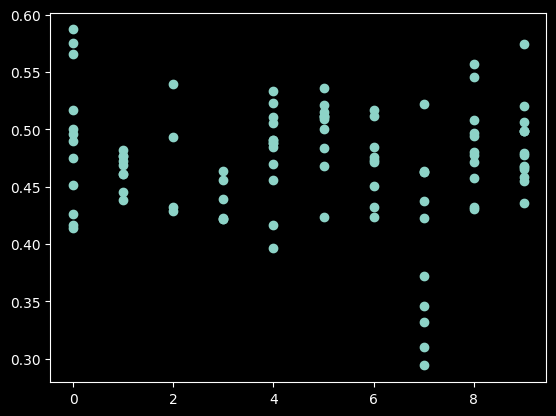

In [4]:
import matplotlib.pyplot as plt

# calculate the similarity between the first image and 100 randomly selected images

similarities = []
lables = []
for i in range(100):
    img2, label2 = test_dataset[np.random.choice(len(test_dataset))]
    similarities.append(test_similarity(img1, img2))
    lables.append(label2)
    
print(f"ancohor image label: {label1}")
plt.scatter(lables, similarities)

    


In [5]:
# embbbeding 
def get_embedding(img):
    with torch.no_grad():
        output = net.forward_one(img.unsqueeze(0).to(device))
        return output

In [6]:
# calculate the embeddings for the images in test_dataset
embeddings = []
labels = []
for i in range(len(test_dataset)):
    img, label = test_dataset[i]
    embeddings.append(get_embedding(img))
    labels.append(label)
    
embeddings = torch.cat(embeddings, dim=0)
print(embeddings.shape) 

torch.Size([10000, 64])


/home/alibina/miniconda3/envs/fastai/lib/python3.11/site-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


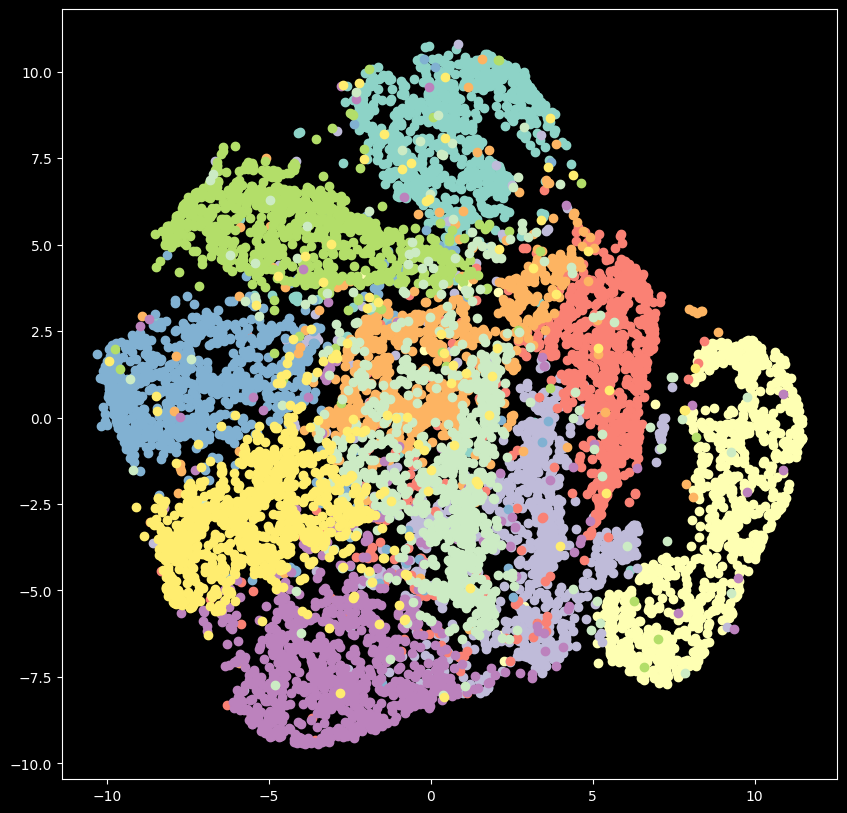

In [7]:
# plot t-SNE of the embeddings
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, perplexity=30, n_iter=300)
embeddings_2d = tsne.fit_transform(embeddings.cpu().numpy())

plt.figure(figsize=(10, 10))
for i in range(10):
    indices = (test_dataset.targets == i)
    plt.scatter(embeddings_2d[indices, 0], embeddings_2d[indices, 1], label=str(i))
    